In [9]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

In [10]:
candidates = read_csv('Data/toi-catalog.csv', comment='#')
known = read_csv('Data/Cross_Ref.csv',comment='#')

In [11]:
candidates.keys()

Index(['Parameter Source Pipeline', 'Detection Pipeline(s)', 'TIC',
       'Full TOI ID', 'TOI Disposition', 'TIC Right Ascension',
       'TIC Declination', 'TIC Right Ascension 2015.5',
       'TIC Declination 2015.5', 'TMag Value', 'TMag Uncertainty',
       'Epoch Value', 'Epoch Error', 'Orbital Period Value',
       'Orbital Period Error', 'Transit Duration Value',
       'Transit Duration Error', 'Transit Depth Value', 'Transit Depth Error',
       'Sectors', 'Public Comment', 'Surface Gravity Value',
       'Surface Gravity Uncertainty', 'Signal ID', 'Star Radius Value',
       'Star Radius Error', 'Planet Radius Value', 'Planet Radius Error',
       'Planet Equilibrium Temperature (K) Value',
       'Effective Temperature Value', 'Effective Temperature Uncertainty',
       'Effective Stellar Flux Value', 'Signal-to-noise', 'Centroid Offset',
       'TFOP Master', 'TFOP SG1a', 'TFOP SG1b', 'TFOP SG2', 'TFOP SG3',
       'TFOP SG4', 'TFOP SG5', 'Alerted', 'Updated'],
      dtype=

In [12]:
tic_id = candidates['TIC']
TOI = candidates['Full TOI ID']
disposition = candidates['TOI Disposition']
Tmag = candidates['TMag Value']
epoch = candidates['Epoch Value']
Period = candidates['Orbital Period Value']
dPeriod = candidates['Orbital Period Error']
Duration = candidates['Transit Duration Value']
Depth = candidates['Transit Depth Value']
R_s = np.array(candidates['Star Radius Value'])
dR_s = np.array(candidates['Star Radius Error'])
R_p = candidates['Planet Radius Value']
dR_p = candidates['Planet Radius Error']
Insolation = candidates['Effective Stellar Flux Value']
T_eq = candidates['Planet Equilibrium Temperature (K) Value']
T_eff = np.array(candidates['Effective Temperature Value'])
#logg = candidates['logg']
RA = candidates['TIC Right Ascension']
Dec = candidates['TIC Declination']
sectors = candidates['Sectors']

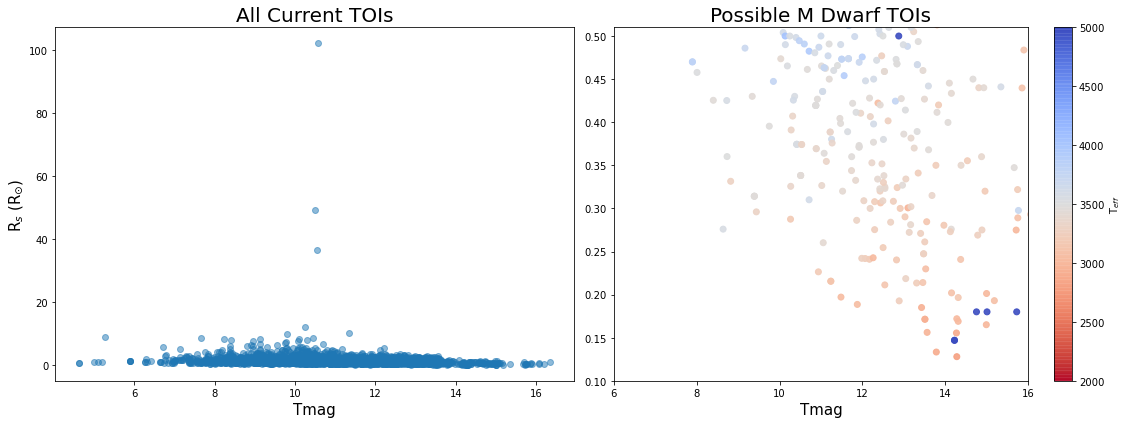

In [13]:
fig, (ax1, ax2) = plt.subplots(figsize=(16,6), nrows=1, ncols=2)
points = plt.scatter(Tmag, R_s, alpha=0.9, c=T_eff, cmap="coolwarm_r", vmin=2000, vmax=5000)

ax1.scatter(Tmag, R_s, alpha=0.5)
ax1.set_ylabel(r'R$_s$ (R$_{\odot}$)', fontsize=15)
ax1.set_xlabel('Tmag',fontsize=15)
ax1.set_title('All Current TOIs',fontsize=20)

fig.colorbar(points, label='T$_{eff}$')
ax2.set_xlabel('Tmag',fontsize=15)
ax2.set_title('Possible M Dwarf TOIs',fontsize=20)
ax2.set_ylim(0.1,0.51)
ax2.set_xlim(6,16)

plt.tight_layout()
plt.savefig('Figs/rs_tmag_plots.pdf')
plt.show()

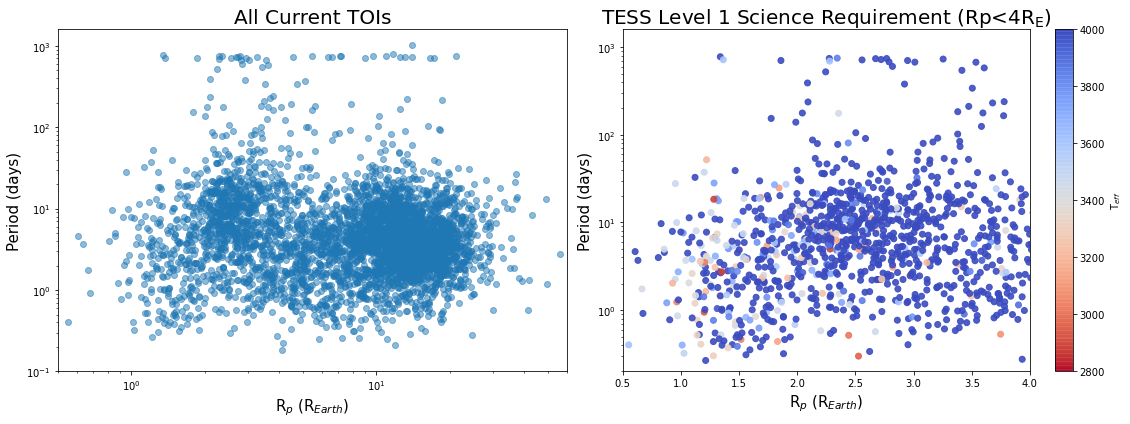

In [14]:
fig, (ax1, ax2) = plt.subplots(figsize=(16,6), nrows=1, ncols=2)
points = plt.scatter(R_p, Period, alpha=0.9, c=T_eff, cmap="coolwarm_r", vmin=2800, vmax=4000)

ax1.scatter(R_p, Period, alpha=0.5)
ax1.set_ylabel('Period (days)', fontsize=15)
ax1.set_xlabel('R$_p$ (R$_{Earth}$)',fontsize=15)
ax1.set_title('All Current TOIs',fontsize=20)
ax1.set_xscale('log')
ax1.set_xlim(5e-1,60)
ax1.set_yscale('log')
ax1.set_ylim(1e-1,)

#ax2.scatter(R_p, Period, alpha=0.5)
fig.colorbar(points, label='T$_{eff}$')
ax2.set_xlabel('R$_p$ (R$_{Earth}$)',fontsize=15)
ax2.set_ylabel('Period (days)', fontsize=15)
ax2.set_title(r'TESS Level 1 Science Requirement (Rp<4R$_{\rm{E}}$)',fontsize=20)
ax2.set_xlim(0.5,4)
ax2.set_yscale('log')
ax2.set_ylim(2e-1,)

plt.tight_layout()
plt.savefig('Figs/rp_period_plots.pdf')
plt.show()

In [15]:
indices = []
for i in range(len(Tmag)):
    if ( ((R_s[i]-dR_s[i]) <= 0.5) and (R_s[i] != R_s[i]) ) or (T_eff[i]<= 4000.0) or (R_s[i] <= 0.5):
        #print('{:.4f} {:.4f} {:.3f} {}'.format(R_s[i], dR_s[i], (R_s[i]-dR_s[i]), T_eff[i]))
        indices.append(i)

In [38]:
tois = np.array(TOI[indices])
len(tois)

389

In [39]:
#print(tois[250:])
new_tois = list(set(tois).difference(known['TOI']))

In [43]:
new_indices = []
for i in range(len(tois)):
    for j in range(len(new_tois)):
        if tois[i] == new_tois[j]:
            new_indices.append(indices[i])

In [47]:
new_indices?

Type:        list
String form: [2616, 2618, 2620, 2648, 2754, 2957, 3054, 3078, 3083, 3113, 3155, 3167, 3170, 3174, 3177, 3237,  <...> , 4926, 4949, 4958, 5045, 5074, 5082, 5084, 5092, 5105, 5108, 5121, 5150, 5155, 5157, 5158, 5162]
Length:      128
Docstring:  
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.


In [12]:
planet = 2505

print(tic_id[planet])
print(TOI[planet])
print(disposition[planet])
print(Period[planet])
print(dPeriod[planet])
print(epoch[planet])
print(Duration[planet])
print(RA[planet])
print(Dec[planet])
print(Tmag[planet])
print(Depth[planet])
print(R_p[planet])
print(dR_p[planet])
print(R_s[planet])
print(dR_s[planet])
print(T_eff[planet])
print(sectors[planet])

33091590
2495.01
PC
7.7953850000000005
0.0030239999999999998
2208.384505
1.694157
104.826976
-4.828231
12.2285
2783.912923
1.8939259999999998
1.366295
0.35290900000000003
0.010681999999999999
3356.0
33
